# Bharat Intern Data Science Internship

## Project 1 : SMS Classifier

##### Code by : Tulika Roy

In [1]:
import pandas as pd
import numpy as np

In [4]:
encodings = ['utf-8','latin1','ISO-8859-1','cp1252']
file_path = r'C:\Users\KIIT0001\Downloads\emailclassification\spam.csv'

for encoding in encodings:
    try:
        df = pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"failes to read with encoding : {encoding}")
        continue
if 'df' in locals():
    print("sucessfully read")
else:
    print("Unable")

failes to read with encoding : utf-8
file successfully read with encoding: latin1
sucessfully read


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1123,ham,Good morning princess! How are you?,NaN,NaN,NaN
2999,ham,Id onluy matters when getting on from offcampus,NaN,NaN,NaN
4594,ham,Yo sorry was in the shower sup,NaN,NaN,NaN
2125,ham,"Sorry im getting up now, feel really bad- tota...",NaN,NaN,NaN
1852,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN


In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.shape


(5572, 5)

In [9]:
df.size

27860

# 1. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
# dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)


In [15]:
df.sample(5)

,v1,v2
4244,ham,Is toshiba portege m100 gd?
2671,ham,"That's cool, I'll come by like &lt;#&gt; ish"
3340,ham,Still i have not checked it da. . .
204,ham,U call me alter at 11 ok.
39,ham,Hello! How's you and how did saturday go? I wa...


In [16]:
# for renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [17]:
df.sample(5)

,target,text
3629,spam,Get the official ENGLAND poly ringtone or colo...
1426,ham,Ok...
4562,ham,Come around &lt;DECIMAL&gt; pm vikky..i'm ots...
2427,ham,Do you think i can move &lt;#&gt; in a week
4726,spam,Had your mobile 10 mths? Update to the latest ...


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [20]:
# to find the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
# to check duplicate values
df.duplicated().sum()

403

In [25]:
# to remove the duplicate values
df = df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

# EDA

In [28]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2477a4bf1d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

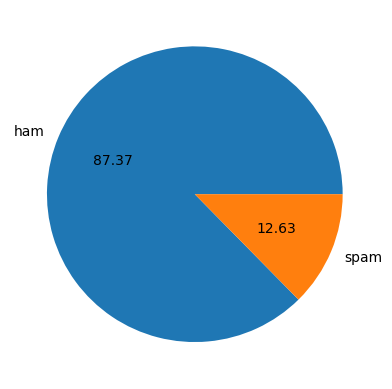

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

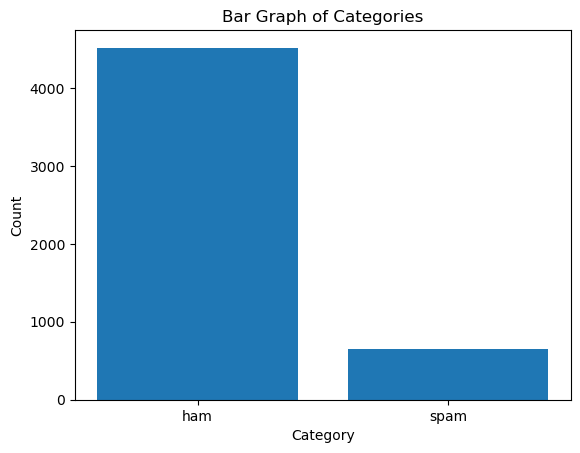

In [36]:

# Create a bar graph
plt.bar(df['target'].value_counts().index, df['target'].value_counts())

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Graph of Categories')

# Show the plot
plt.show()


In [37]:
!pip install nltk

In [38]:
import nltk

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [40]:
df['num_characters']=df['text'].apply(len)

In [41]:
df.head(6)

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148


In [42]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(3)

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [45]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [47]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


C:\Users\KIIT0001\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


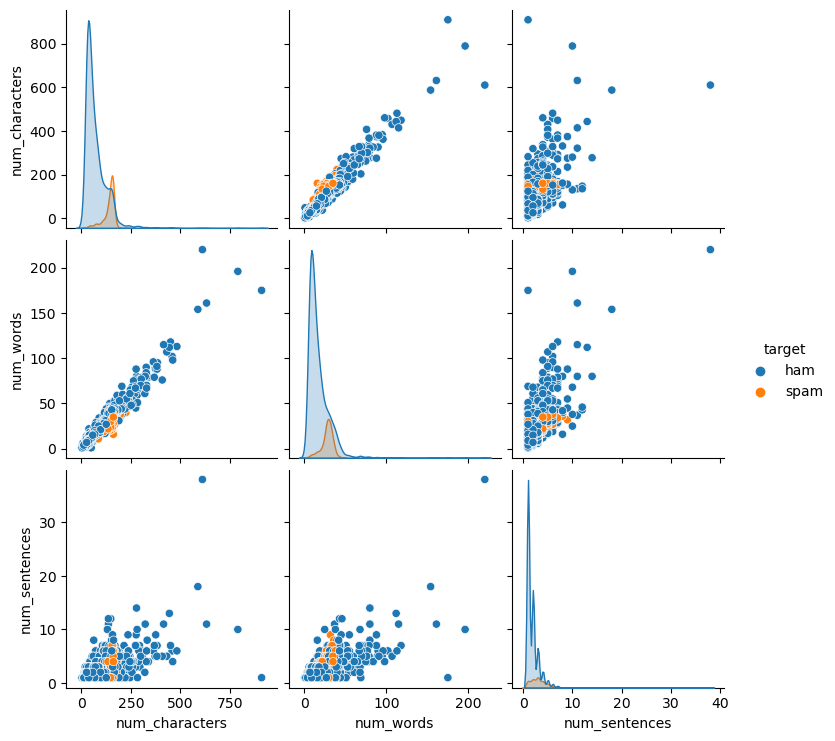

In [51]:
import seaborn as sns
sns.pairplot(df,hue='target')

In [55]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'ham'

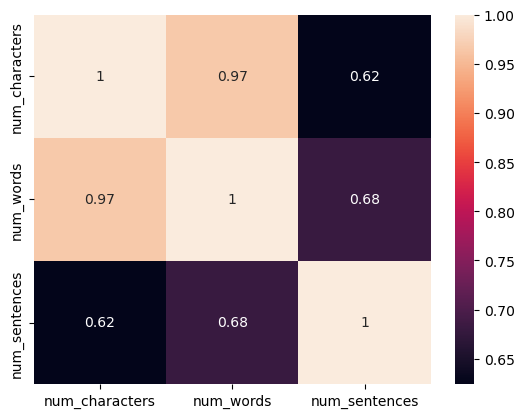

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop non-numeric columns before creating the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Show the plot
plt.show()


# Data Preprocessing

#### Lower case

#### Tokenization

#### Removing special characters

#### Removing stop words and punctuations

#### Stemming

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
transformed_text = transform_text("Regret of not trying is much heavier than regret of failure")
print(transformed_text)
    
            

regret tri much heavier regret failur


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [67]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 279.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 435.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 554.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 697.2 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 808.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 805.3 kB/s eta 0:00:00


In [69]:
from wordcloud import WordCloud

In [70]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [74]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [75]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [76]:
len(spam_corpus)

0